<a href="https://colab.research.google.com/github/sabbir-mirza-013/My-web-dev-journey/blob/main/Breast_cancer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the dataset**

In [31]:
import os
import json
import base64
import zlib
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import zipfile



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


zip_path = '/content/drive/MyDrive/Breast Cancer Images dataset/breast-ultrasound-images-dataset.zip'
extract_to = '/content/drive/MyDrive/Breast Cancer Images dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Check the contents
os.listdir(extract_to)


['breast-ultrasound-images-dataset.zip', 'breast-ultrasound-images-dataset']

In [ ]:

base_path = "/content/drive/MyDrive/Breast Cancer Images dataset/breast-ultrasound-images-dataset"
img_dir = os.path.join(base_path, "img")
ann_dir = os.path.join(base_path, "ann")


In [ ]:
print("Sample Images:", os.listdir(img_dir)[:3])
print("Sample Annotations:", os.listdir(ann_dir)[:3])


Sample Images: ['normal (70).png', 'normal (86).png', 'normal (107).png']
Sample Annotations: ['normal (27).png.json', 'normal (14).png.json', 'normal (70).png.json']


In [ ]:
# import json

# sample_json_file = os.listdir(ann_dir)[0]
# json_path = os.path.join(ann_dir, sample_json_file)

# with open(json_path, 'r') as f:
#     data = json.load(f)

# import pprint
# pprint.pprint(data)


{'description': '',
 'objects': [],
 'size': {'height': 707, 'width': 804},
 'tags': [{'createdAt': '2023-08-22T15:40:03.835Z',
           'id': 801356,
           'labelerLogin': 'gr@datasetninja.com',
           'name': 'normal',
           'tagId': 8398,
           'updatedAt': '2023-08-22T15:40:03.835Z',
           'value': None}]}


In [ ]:
# import cv2
# import numpy as np

# def preprocess_image(img_path, img_size=256):
#     """Load grayscale image, resize, denoise, normalize."""
#     img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#     img = cv2.resize(img, (img_size, img_size))

#     # Apply Gaussian blur (noise reduction)
#     img = cv2.GaussianBlur(img, (3, 3), 0)

#     # Normalize to [0, 1]
#     img = img.astype(np.float32) / 255.0

#     return img


In [ ]:
# !pip install supervisely


In [ ]:
# import json
# import base64
# import zlib
# from supervisely import Bitmap

# def decode_bitmap_mask(json_path, target_size=256):
#     with open(json_path, 'r') as f:
#         data = json.load(f)

#     # Extract shape
#     H, W = data['size']['height'], data['size']['width']

#     # Extract bitmap info
#     obj = data['objects'][0]
#     origin_x, origin_y = obj['bitmap']['origin']
#     compressed_data = base64.b64decode(obj['bitmap']['data'])
#     decompressed = zlib.decompress(compressed_data)

#     # Decode bitmap using Supervisely
#     bitmap = Bitmap(decompressed, origin=[origin_x, origin_y])

#     # Build full-size binary mask
#     mask = np.zeros((H, W), dtype=np.uint8)
#     bh, bw = bitmap.data.shape
#     mask[origin_y:origin_y+bh, origin_x:origin_x+bw] = bitmap.data

#     # Resize mask to target size
#     mask = cv2.resize(mask, (target_size, target_size), interpolation=cv2.INTER_NEAREST)
#     return mask.astype(np.uint8)


In [ ]:
# import base64
# import zlib
# import numpy as np
# import cv2
# import json

# def decode_bitmap_mask(json_path, target_size=256):
#     with open(json_path, 'r') as f:
#         data = json.load(f)

#     obj = data['objects'][0]
#     origin_x, origin_y = obj['bitmap']['origin']
#     size = data['size']  # original image size
#     H, W = size['height'], size['width']

#     # Decode base64 → decompress zlib → convert to uint8 array
#     compressed_data = base64.b64decode(obj['bitmap']['data'])
#     decompressed = zlib.decompress(compressed_data)
#     mask_np = np.frombuffer(decompressed, dtype=np.uint8)
#     mask_np = mask_np.reshape((obj['bitmap']['data'].count('\n')+1, -1)) if isinstance(obj['bitmap']['data'], str) else mask_np.reshape((H - origin_y, W - origin_x))

#     # Place the decoded region into full-size mask
#     full_mask = np.zeros((H, W), dtype=np.uint8)
#     h, w = mask_np.shape
#     full_mask[origin_y:origin_y + h, origin_x:origin_x + w] = mask_np

#     # Resize to target size
#     mask_resized = cv2.resize(full_mask, (target_size, target_size), interpolation=cv2.INTER_NEAREST)
#     return mask_resized


In [ ]:
# def get_label_from_json(json_path):
#     with open(json_path, 'r') as f:
#         data = json.load(f)
#     return data['objects'][0]['classTitle']

# label_map = {'normal': 0, 'benign': 1, 'malignant': 2}



In [ ]:
# img_path = os.path.join(img_dir, 'benign (1).png')
# json_path = os.path.join(ann_dir, 'benign (1).png.json')

# img = preprocess_image(img_path)
# mask = decode_bitmap_mask(json_path)
# label = get_label_from_json(json_path)

# print("Image shape:", img.shape)
# print("Mask shape:", mask.shape)
# print("Label:", label)


Image shape: (256, 256)
Mask shape: (256, 256)
Label: benign


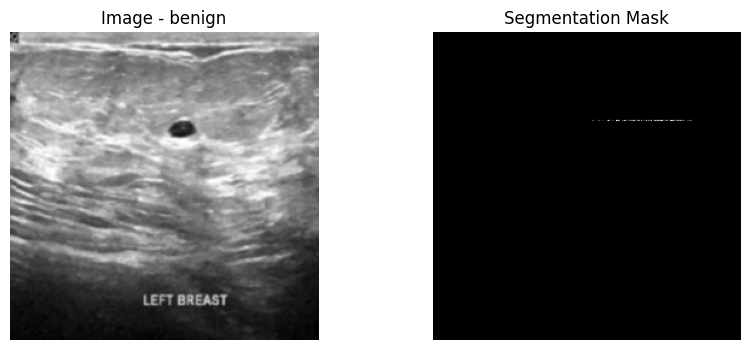

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 4))
# plt.subplot(1, 2, 1)
# plt.imshow(img, cmap='gray')
# plt.title(f"Image - {label}")
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(mask, cmap='gray')
# plt.title("Segmentation Mask")
# plt.axis('off')
# plt.show()


**This code defines a custom Keras data generator named BreastCancerDataset for multi-task learning — specifically for breast ultrasound image classification and segmentation. It loads images and their corresponding masks and labels from disk, processes them, and returns them in batches**

In [33]:
# Map label strings to integer class indices
label_map = {"normal": 0, "benign": 1, "malignant": 2}


In [32]:
class BreastCancerDataset(Sequence):
    def __init__(self, img_dir, ann_dir, batch_size=8, img_size=256, shuffle=True):
        self.img_dir = img_dir
        self.ann_dir = ann_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle

        # Match files by name
        self.filenames = [f for f in os.listdir(self.img_dir) if f.endswith(".png") or f.endswith(".jpg")]
        self.on_epoch_end()

    def __len__(self):
        # Total batches per epoch
        return int(np.ceil(len(self.filenames) / self.batch_size))

    def on_epoch_end(self):
        # Shuffle at epoch end
        if self.shuffle:
            np.random.shuffle(self.filenames)

    def __getitem__(self, index):
        # Get batch file names
        batch_files = self.filenames[index * self.batch_size:(index + 1) * self.batch_size]

        # Allocate batch arrays
        X = np.zeros((len(batch_files), self.img_size, self.img_size, 1), dtype=np.float32)
        Y_mask = np.zeros((len(batch_files), self.img_size, self.img_size, 1), dtype=np.float32)
        Y_label = np.zeros((len(batch_files), 3), dtype=np.float32)  # one-hot

        for i, file in enumerate(batch_files):
            img_path = os.path.join(self.img_dir, file)
            ann_path = os.path.join(self.ann_dir, file.rsplit(".", 1)[0] + ".json")

            # Load and preprocess image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (self.img_size, self.img_size))
            img = cv2.GaussianBlur(img, (3, 3), 0)
            img = img.astype(np.float32) / 255.0
            X[i, ..., 0] = img  # add channel dimension

            # Load and decode segmentation mask
            mask = self.decode_mask(ann_path)
            Y_mask[i, ..., 0] = mask

            # Extract and one-hot encode label
            label_str = self.get_label_from_json(ann_path)
            class_idx = label_map[label_str]
            Y_label[i, class_idx] = 1.0

        return X, {"seg_output": Y_mask, "class_output": Y_label}

    def decode_mask(self, json_path):
        # Decode the bitmap-based mask
        with open(json_path, 'r') as f:
            data = json.load(f)

        obj = data['objects'][0]
        origin_x, origin_y = obj['bitmap']['origin']
        size = data['size']
        H, W = size['height'], size['width']

        compressed_data = base64.b64decode(obj['bitmap']['data'])
        decompressed = zlib.decompress(compressed_data)
        mask_np = np.frombuffer(decompressed, dtype=np.uint8).reshape((H - origin_y, W - origin_x))

        full_mask = np.zeros((H, W), dtype=np.uint8)
        h, w = mask_np.shape
        full_mask[origin_y:origin_y + h, origin_x:origin_x + w] = mask_np

        # Resize mask to match image
        mask_resized = cv2.resize(full_mask, (self.img_size, self.img_size), interpolation=cv2.INTER_NEAREST)
        return mask_resized

    def get_label_from_json(self, json_path):
        with open(json_path, 'r') as f:
            data = json.load(f)
        return data['objects'][0]['classTitle']
